In [2]:
import math
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
page_id = "newworldjp"

path = 'post/'+page_id+'_post.csv'

In [3]:
data = pd.read_csv(path, encoding = 'utf8')

In [4]:
data.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,470865636632474_514571342261903,號外📣📣📣📣📣 現貨日本直送熊本熊暖腳攬枕🇯🇵\r\n\r\n天文台話下星期跌到得10度😖😖...,Photos from New World Japan's post,photo,https://www.facebook.com/470865636632474/posts...,2018-01-05 10:32:58,1,0,0,1,0,0,0,0,0
1,470865636632474_514342202284817,登登登登，早排我地NWJ 到日本入左唔少新貨！ 有套有貼子有袋仔🤗大家有興趣既購友快d，in...,NaN,video,https://www.facebook.com/470865636632474/posts...,2018-01-04 22:48:37,0,0,0,0,0,0,0,0,0
2,470865636632474_514319085620462,IQOS accessories 現貨相❤️\r\n\r\n姐係咁，好多客人會問我地，到底你...,Photos from New World Japan's post,photo,https://www.facebook.com/470865636632474/posts...,2018-01-04 21:45:04,0,0,0,0,0,0,0,0,0
3,470865636632474_508923046160066,日本🇯🇵製造 品牌Zario Grandee iqos 牛皮收納袋\r\n\r\n呢款日本製...,Photos from New World Japan's post,photo,https://www.facebook.com/470865636632474/posts...,2017-12-23 10:02:21,0,0,0,0,0,0,0,0,0
4,470865636632474_508911486161222,日本進口 iqos 皮套\r\n\r\n有時候做做下野想落樓下打邊爐，食食下飯又可能想行開打...,Photos from New World Japan's post,photo,https://www.facebook.com/470865636632474/posts...,2017-12-23 09:00:15,0,0,0,0,0,0,0,0,0


In [5]:
len(data)

216

In [6]:
data = data[(data['num_reactions']!=0) & (data['status_message'].notnull())].reindex()

In [7]:
len(data)

57

In [8]:
data['datetime'] = data['status_published'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data['weekday'] = data['datetime'].apply(lambda x: x.weekday_name)
data['hour'] = data['datetime'].apply(lambda x:  x.hour)

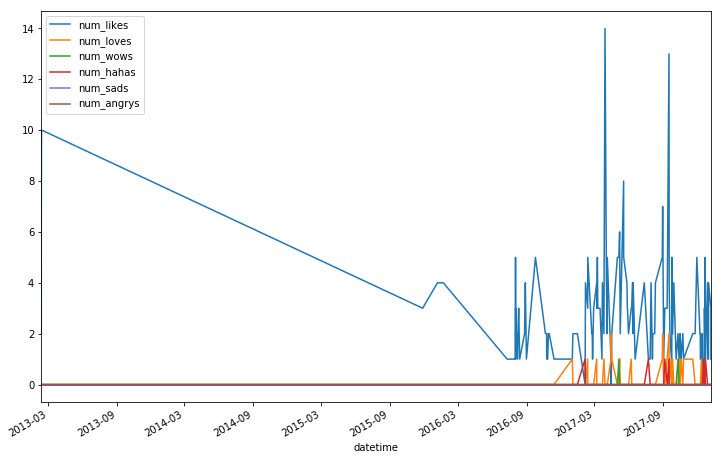

In [9]:
data.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

In [ ]:
data2 = data.drop([323])

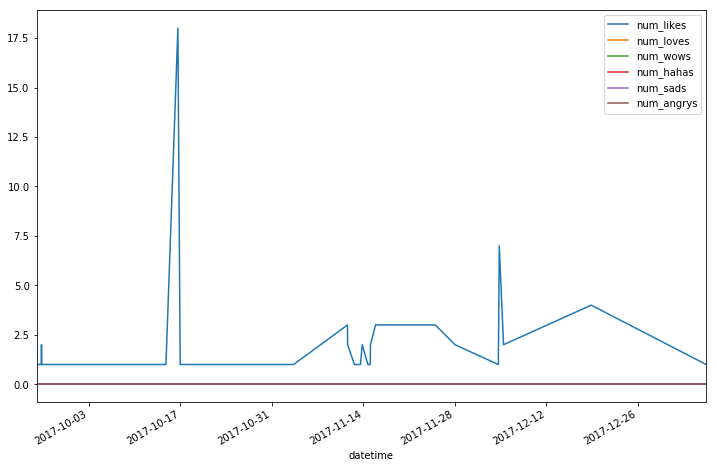

In [9]:
data.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

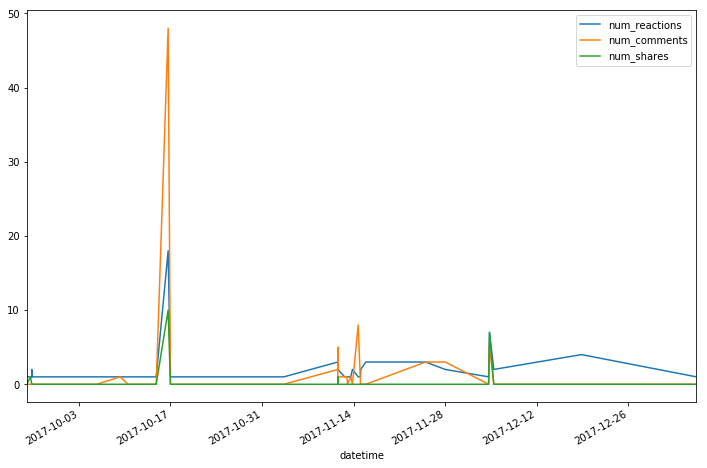

In [10]:
data.plot(x='datetime', y=['num_reactions', 'num_comments', 'num_shares'],
       figsize=(12,8))

In [11]:
import datetime
delta_datetime = data['datetime'].shift(1) - data['datetime']
delta_datetime_df = pd.Series(delta_datetime).describe().apply(str)
delta_datetime_df = delta_datetime_df.to_frame(name='frequent of posts')
delta_datetime_df

,frequent of posts
count,56
mean,1 days 19:52:59.839285
std,3 days 17:10:59.179598
min,0 days 00:00:00
25%,0 days 00:01:53.500000
50%,0 days 07:16:47
75%,1 days 04:06:45.750000
max,17 days 14:00:14


In [12]:
def weekday(d):
    list_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'weekday': list_value}).reset_index()
    return df

In [13]:
df_weekday = weekday(dict(data['weekday'].value_counts()))
df_weekday

,index,weekday
0,Monday,20
1,Tuesday,7
2,Wednesday,11
3,Thursday,2
4,Friday,6
5,Saturday,8
6,Sunday,3


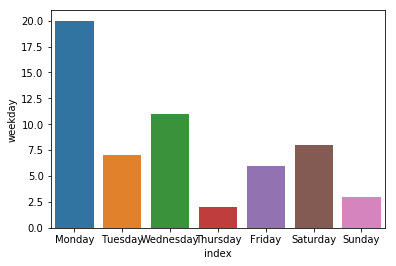

In [14]:
sns.barplot(x='index', y='weekday', data = df_weekday)

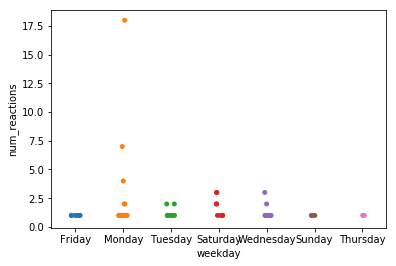

In [15]:
sns.stripplot(x='weekday',y='num_reactions', data = data, jitter=True)

In [16]:

def hour(d):
    list_key = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'hour': list_value}).reset_index()
    return df

In [17]:
df_hour = hour(dict(data['hour'].value_counts()))


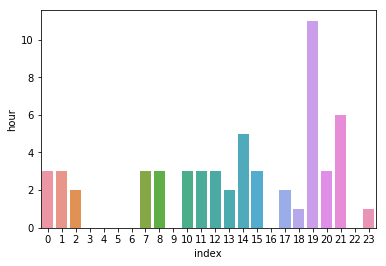

In [18]:
ax = sns.barplot(x='index', y='hour', data = df_hour)

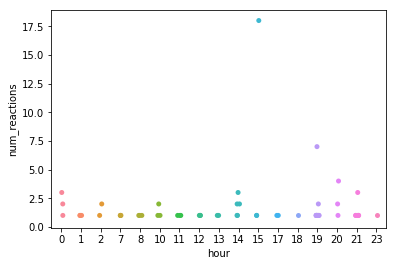

In [19]:
sns.stripplot(x='hour',y='num_reactions', data = data, jitter=True)

In [20]:
df_status_type = data['status_type'].value_counts().to_frame(name='status_type')
df_status_type

,status_type
photo,54
video,3


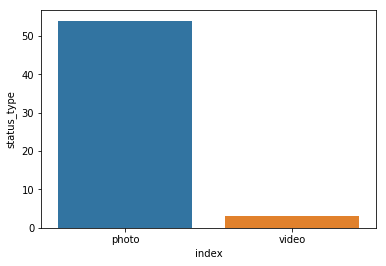

In [21]:
sns.barplot(x='index', y='status_type', data = df_status_type.reset_index())

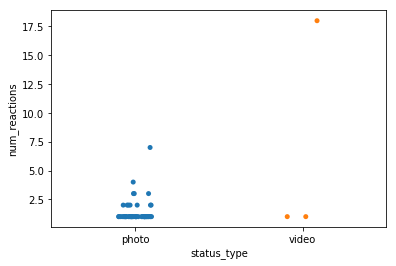

In [22]:
sns.stripplot(x="status_type", y="num_reactions", data=data, jitter=True)

In [23]:
import jieba
import jieba.analyse
import operator
from wordcloud import WordCloud, STOPWORDS

In [26]:
list(data['status_message'])[54]

'#iqos #iqoshk #iqoscase #iqos外殼 #sticker #iqossticker #makeinjapan #iqos24pluswhite #iqoscustom #iqos貼紙 #iqos貼 #newworldjapan #iqos香港 #日本代購 #iqosshop #iqosaccessories #iqos24 #iqos24plus \r\n日本代購iqos sticker😁 360度全包 仲可以時時為你既iqos變身，有興趣既朋友仔請inbox 💖'

In [28]:
for one in jieba.cut(list(data['status_message'])[54]):
    print (one)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Tommy\AppData\Local\Temp\jieba.cache
Loading model cost 0.988 seconds.
Prefix dict has been built succesfully.


#
iqos
 
#
iqoshk
 
#
iqoscase
 
#
iqos
外殼
 
#
sticker
 
#
iqossticker
 
#
makeinjapan
 
#
iqos24pluswhite
 
#
iqoscustom
 
#
iqos
貼紙
 
#
iqos
貼
 
#
newworldjapan
 
#
iqos
香港
 
#
日本
代購
 
#
iqosshop
 
#
iqosaccessories
 
#
iqos24
 
#
iqos24plus
 


日本
代購
iqos
 
sticker
😁
 
360
度
全包
 
仲
可以
時時
為
你
既
iqos
變身
，
有興趣
既
朋友
仔請
inbox
 
💖


In [ ]:
jieba.analyse.extract_tags(list(data['status_message'])[99], topK=20)

In [29]:
def jieba_extract(message_list):
    word_count = {}
    for message in message_list:
        seg_list = jieba.analyse.extract_tags(message, topK=120)
        for seg in seg_list:
            if not seg in word_count:
                word_count[seg] = 1
            else:
                word_count[seg] += 1

    sorted_word_count = sorted(word_count.items(), key=operator.itemgetter(1))
    #sorted_word_count_dict = dict(sorted_word_count)
    sorted_word_count.reverse()
    return sorted_word_count
sorted_word_count = jieba_extract(list(data['status_message']))

In [30]:
sorted_word_count_dict = dict(sorted_word_count)

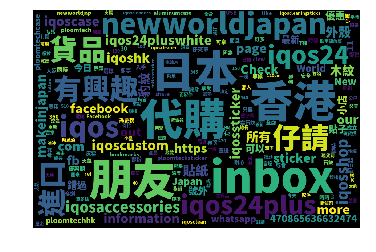

In [31]:
tpath = 'NotoSansCJKtc-Black.otf'
wc = WordCloud(max_font_size=120, relative_scaling=.1,font_path=tpath,width=900, height=600, stopwords=True).fit_words(sorted_word_count_dict)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 200)
plt.show()